# Identifying Low-Risk Aircraft for Expansion into Aviation Business

## Data Presentation

In [24]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Loading the dataset
# Using "latin1" encoding to handle special characters
# Setting low_memory to False to avoid DtypeWarning for mixed types in columns (Column 6,7,28)

aviation_data =pd.read_csv(r"C:\Users\A808865\Desktop\moringa\Project Phase 1\Data Sets\AviationData.csv", encoding='latin1', low_memory=False)

# Displaying the first few rows of the dataset to understand its structure

aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


###### Cleaning up Columns

In [26]:
# Shape of the dataset - Displaying the number of rows and columns
print("Shape of the dataset:", aviation_data.shape)


Shape of the dataset: (88889, 31)


In [27]:
# Replacing period (".") in column names with underscores(_) to avoid syntax issues and ensure consistency

aviation_data.columns = aviation_data.columns.str.replace('.', '_')
aviation_data.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [28]:
# Convert event_date column to datetime format
aviation_data['Event_Date'] = pd.to_datetime(aviation_data['Event_Date'])


# Extracting the year from the event_date column and creating a new column "Year"
aviation_data['Year'] = aviation_data['Event_Date'].dt.year
aviation_data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979


I chose to focus on the most recent data, specifically from 2012 to 2022, because it is more relevant to the continuously evolving aviation industry. This range also contains fewer missing values, making the analysis more reliable

In [29]:
aviation_data = aviation_data[aviation_data['Event_Date'].dt.year.between(2012, 2022)]
aviation_data.head()


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,"Willimantic, CT",United States,414430N,0721123W,IJD,Windham Airport,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020,2012
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,"Lohn, TX",United States,311930N,0992430W,NaN,NaN,...,SKY HORSE HELICOPTERS INC,0.0,0.0,2.0,0.0,VMC,NaN,The improper installation of the tail rotor ge...,25-09-2020,2012
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,"Eureka, CA",United States,404812N,0124646W,EKA,Murray Field Airport,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020,2012
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,"River Ranch, FL",United States,027543N,0813448W,2RR,River Ranch,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020,2012
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,"Shelter Island, NY",United States,004140N,0722035W,NaN,Klenawicus Airfield,...,NORTHEASTERN AVIATION CORP,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020,2012


In [60]:
# Quick summary of data types and non-null values
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10969 entries, 71225 to 88767
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                10969 non-null  object        
 1   Investigation_Type      10969 non-null  object        
 2   Accident_Number         10969 non-null  object        
 3   Event_Date              10969 non-null  datetime64[ns]
 4   Injury_Severity         10969 non-null  object        
 5   Aircraft_damage         10969 non-null  object        
 6   Registration_Number     10969 non-null  object        
 7   Make                    10969 non-null  object        
 8   Model                   10969 non-null  object        
 9   Amateur_Built           10969 non-null  object        
 10  Number_of_Engines       10969 non-null  float64       
 11  Engine_Type             10969 non-null  object        
 12  Purpose_of_flight       10969 non-null  ob

In [31]:
# Replaceing any blank entries and common text representations of missing values with pd.NA.
aviation_data.replace(["", "NaN", "nan", "N/A", "n/a"], pd.NA, inplace=True)
aviation_data.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Year
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,"Willimantic, CT",United States,414430N,0721123W,IJD,Windham Airport,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A partial loss of engine power due to carburet...,25-09-2020,2012
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,"Lohn, TX",United States,311930N,0992430W,NaN,NaN,...,SKY HORSE HELICOPTERS INC,0.0,0.0,2.0,0.0,VMC,NaN,The improper installation of the tail rotor ge...,25-09-2020,2012
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,"Eureka, CA",United States,404812N,0124646W,EKA,Murray Field Airport,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,A collision with a deer while landing.,25-09-2020,2012
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,"River Ranch, FL",United States,027543N,0813448W,2RR,River Ranch,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020,2012
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,"Shelter Island, NY",United States,004140N,0722035W,NaN,Klenawicus Airfield,...,NORTHEASTERN AVIATION CORP,0.0,0.0,0.0,1.0,VMC,NaN,"A hard landing, which resulted in a failure of...",25-09-2020,2012


In [32]:
# Checking Missing Values 

aviation_data.isnull().sum().sort_values(ascending=False)

Broad_phase_of_flight     17664
Schedule                  15924
Air_carrier                9158
Airport_Name               7156
Airport_Code               7059
Report_Status              5680
Engine_Type                4836
Purpose_of_flight          3534
Weather_Condition          3389
Number_of_Engines          3137
Longitude                  2093
Latitude                   2093
Aircraft_damage            1227
Publication_Date           1013
Injury_Severity             849
FAR_Description             707
Aircraft_Category           315
Model                        20
Make                         15
Registration_Number          10
Country                       0
Location                      0
Event_Date                    0
Accident_Number               0
Investigation_Type            0
Year                          0
Amateur_Built                 0
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Event_Id

In [33]:
#Proportionwise of the missing variables
aviation_data.isnull().mean()*100

Event_Id                    0.000000
Investigation_Type          0.000000
Accident_Number             0.000000
Event_Date                  0.000000
Location                    0.000000
Country                     0.000000
Latitude                   11.848958
Longitude                  11.848958
Airport_Code               39.962636
Airport_Name               40.511775
Injury_Severity             4.806386
Aircraft_damage             6.946332
Aircraft_Category           1.783288
Registration_Number         0.056612
Make                        0.084918
Model                       0.113225
Amateur_Built               0.000000
Number_of_Engines          17.759284
Engine_Type                27.377717
FAR_Description             4.002491
Schedule                   90.149457
Purpose_of_flight          20.006793
Air_carrier                51.845562
Total_Fatal_Injuries        0.000000
Total_Serious_Injuries      0.000000
Total_Minor_Injuries        0.000000
Total_Uninjured             0.000000
W

In [34]:
# dropping columns where more than 30% of the data is missing.

threshold = 0.3

#Calculating the proportion
High_missing=aviation_data.isnull().mean()

#Identifying those columns

Col_High_miss=High_missing[High_missing>threshold].index.tolist()

Col_High_miss

['Airport_Code',
 'Airport_Name',
 'Schedule',
 'Air_carrier',
 'Broad_phase_of_flight',
 'Report_Status']

In [35]:
# Dropping Columns we wont be needing for analysis and they also have lots of missing values

aviation_data=aviation_data.drop(['Location', 'Country', 'Publication_Date','Report_Status', 'Aircraft_Category',  'Broad_phase_of_flight','Schedule', 'Air_carrier' ,'FAR_Description', 'Longitude', 'Latitude', 'Airport_Code', 'Airport_Name'], axis=1)
aviation_data.head()



,Event_Id,Investigation_Type,Accident_Number,Event_Date,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,Non-Fatal,Substantial,N667JH,HANEY JOHN F B,SEASTAR XP,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,Non-Fatal,Substantial,N9021R,CONTINENTAL COPTERS INC.,47G2,No,1.0,Reciprocating,Aerial Observation,0.0,0.0,2.0,0.0,VMC,2012
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,Non-Fatal,Substantial,N45WM,MCADAM W E,CHRISTEN EAGLE II,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,Non-Fatal,Substantial,N171GS,MAULE,M-5-180C,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,2012
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,Non-Fatal,Substantial,N8282P,PIPER,PA-34-200T,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012


In [36]:
### checking missing value of the remaining columns 

aviation_data.isnull().sum()

Event_Id                     0
Investigation_Type           0
Accident_Number              0
Event_Date                   0
Injury_Severity            849
Aircraft_damage           1227
Registration_Number         10
Make                        15
Model                       20
Amateur_Built                0
Number_of_Engines         3137
Engine_Type               4836
Purpose_of_flight         3534
Total_Fatal_Injuries         0
Total_Serious_Injuries       0
Total_Minor_Injuries         0
Total_Uninjured              0
Weather_Condition         3389
Year                         0
dtype: int64

In [37]:
# dropping missing value (rows) 
aviation_data.dropna(inplace=True)
aviation_data.head()


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,Non-Fatal,Substantial,N667JH,HANEY JOHN F B,SEASTAR XP,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,Non-Fatal,Substantial,N9021R,CONTINENTAL COPTERS INC.,47G2,No,1.0,Reciprocating,Aerial Observation,0.0,0.0,2.0,0.0,VMC,2012
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,Non-Fatal,Substantial,N45WM,MCADAM W E,CHRISTEN EAGLE II,Yes,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,Non-Fatal,Substantial,N171GS,MAULE,M-5-180C,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,2012
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,Non-Fatal,Substantial,N8282P,PIPER,PA-34-200T,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012


In [38]:

# Checking the data types of the columns

print(aviation_data.dtypes)

Event_Id                          object
Investigation_Type                object
Accident_Number                   object
Event_Date                datetime64[ns]
Injury_Severity                   object
Aircraft_damage                   object
Registration_Number               object
Make                              object
Model                             object
Amateur_Built                     object
Number_of_Engines                float64
Engine_Type                       object
Purpose_of_flight                 object
Total_Fatal_Injuries             float64
Total_Serious_Injuries           float64
Total_Minor_Injuries             float64
Total_Uninjured                  float64
Weather_Condition                 object
Year                               int64
dtype: object


In [61]:
# Summary Statistics of the dataset
aviation_data.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Year,incident_count
count,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000,10969.000000
mean,1.078494,0.271766,0.263105,0.156532,1.070471,2016.080135,1.355183
std,0.290472,0.762261,0.623269,0.472458,2.092424,2.844989,4.353417
min,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2018.000000,1.000000
max,8.000000,11.000000,9.000000,5.000000,179.000000,2022.000000,60.000000


# Data Analysis

### Understanding Aircraft


###### Using Registration_number to track how many times each aircraft has appeared in multiple incident

######  If a plane shows up multiple times, it may have been involved in multiple accidents/incidents — indicating risk.

In [64]:
# Standardizing the column removing any leading and trailing white spaces and converting to title case for consistency

aviation_data['Registration_Number'] = aviation_data['Registration_Number'].str.strip().str.title()


# Number of times each aircraft registration has appeared

aircraft_counts = aviation_data['Registration_Number'].value_counts()

# Filtering & Displaying only those with more than 1 occurrence (multiple incidents)

multiple_incidents = aircraft_counts[aircraft_counts > 1]

multiple_incidents


Unreg     60
N185Dk     3
N2791P     3
N7184B     3
N21Za      3
          ..
N7257D     2
N2264X     2
N3085G     2
N8402K     2
N89Zc      2
Name: Registration_Number, Length: 167, dtype: int64

To assess and label the risk level of each aircraft for better investment decision-making i calculated how many incidents each aircraft registration has been involved in and classifies them into "Low Risk" or "High Risk" based on the number of incidents.

Aircraft registration is classified as "Low Risk" if it has 10 or fewer incidents, or "High Risk" if they have more than 10 incidents. 

In [ ]:


# Creating 'incident_count' column to count the number of incidents for each aircraft registration number

aviation_data['incident_count'] = aviation_data['Registration_Number'].map(aircraft_counts)

#  Classify risk into Low, Medium, High based on the number of incidents (Registration_Number)

def classify_risk(count):
    if pd.isna(count) or count <= 10:
        return 'Low Risk'
    else:
        return 'High Risk'

aviation_data['multiple_incident_risk'] = aviation_data['incident_count'].apply(classify_risk)
aviation_data.head(5)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,...,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year,incident_count,multiple_incident_risk
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,Non-Fatal,Substantial,N667JH,HANEY JOHN F B,SEASTAR XP,Yes,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,Non-Fatal,Substantial,N9021R,CONTINENTAL COPTERS INC.,47G2,No,...,Reciprocating,Aerial Observation,0.0,0.0,2.0,0.0,VMC,2012,1,Low Risk
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,Non-Fatal,Substantial,N45WM,MCADAM W E,CHRISTEN EAGLE II,Yes,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,Non-Fatal,Substantial,N171GS,MAULE,M-5-180C,No,...,Reciprocating,Personal,0.0,0.0,0.0,3.0,VMC,2012,1,Low Risk
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,Non-Fatal,Substantial,N8282P,PIPER,PA-34-200T,No,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk


#####  Assess the potential risk each aircraft poses in terms of safety, reliability, and maintenance (Aircraft Damage)
###### Assigning low risk and medium risk

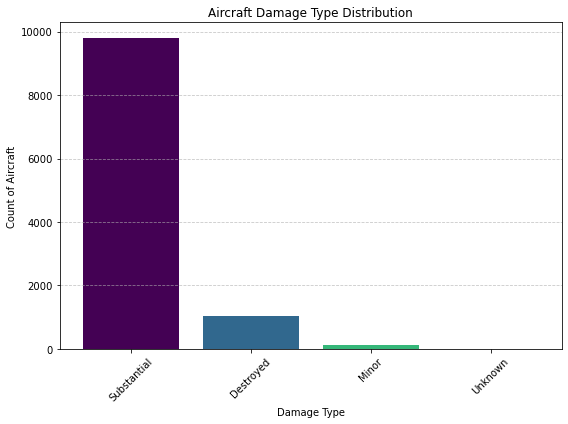

In [42]:
import matplotlib.pyplot as plt

# occurrences of each unique Aircraft Damage type
damage_counts = aviation_data['Aircraft_damage'].value_counts()

# Create a color array using the 'viridis' colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(damage_counts)))

# Plotting bar chart with colormap
plt.figure(figsize=(8, 6))
plt.bar(damage_counts.index, damage_counts.values, color=colors)

plt.title('Aircraft Damage Type Distribution')
plt.xlabel('Damage Type')
plt.ylabel('Count of Aircraft')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
# Classifying Aircraft Damage Risk based on the 'Aircraft_damage' column

def classify_risk(row):
    if pd.isna(row['Aircraft_damage']):
        return 'Unknown Risk'  # Handle missing values
    elif (row['Aircraft_damage'] == 'destroyed') or (row['Aircraft_damage'] == 'substantial'):
        return 'High Risk'
    else:
        return 'Low Risk'

# creating new column for Aircraft damage Risk Classification  
aviation_data['aircraft_damage_risk'] = aviation_data.apply(classify_risk, axis=1)
aviation_data.head(10)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,...,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year,incident_count,multiple_incident_risk,aircraft_damage_risk
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,Non-Fatal,Substantial,N667JH,HANEY JOHN F B,SEASTAR XP,Yes,...,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,Non-Fatal,Substantial,N9021R,CONTINENTAL COPTERS INC.,47G2,No,...,Aerial Observation,0.0,0.0,2.0,0.0,VMC,2012,1,Low Risk,Low Risk
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,Non-Fatal,Substantial,N45WM,MCADAM W E,CHRISTEN EAGLE II,Yes,...,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,Non-Fatal,Substantial,N171GS,MAULE,M-5-180C,No,...,Personal,0.0,0.0,0.0,3.0,VMC,2012,1,Low Risk,Low Risk
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,Non-Fatal,Substantial,N8282P,PIPER,PA-34-200T,No,...,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk
71230,20120111X92548,Accident,CEN12CA132,2012-01-02,Non-Fatal,Substantial,N9952Q,PIPER,PA-18-135,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,2012,1,Low Risk,Low Risk
71231,20120104X41711,Accident,CEN12CA121,2012-01-03,Non-Fatal,Substantial,N120J,BUTLER JOHN R,SX 300,Yes,...,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk
71232,20120105X35308,Accident,CEN12LA124,2012-01-03,Non-Fatal,Substantial,N5768W,PIPER,PA-28-160,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,2012,1,Low Risk,Low Risk
71233,20120104X92439,Accident,CEN12TA122,2012-01-04,Non-Fatal,Substantial,N54872,CESSNA,172P,No,...,Public Aircraft - Federal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk
71234,20120106X15754,Accident,WPR12LA075,2012-01-05,Non-Fatal,Substantial,N104RM,PIPER,AEROSTAR 601P,No,...,Personal,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk


### Injury Severity

Removed the numbers in parentheses from the Injury_Severity column because those numbers (like Fatal(2)) are already recorded in the Total_Fatal_Injuries column, so keeping them would be repetitive.

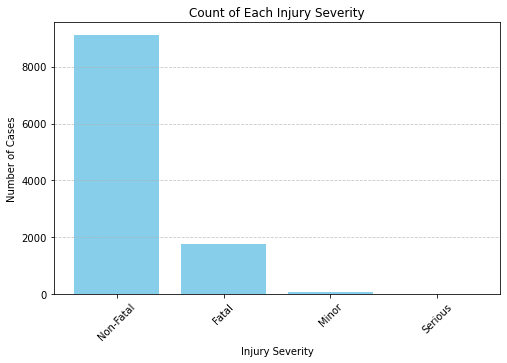

In [44]:
# Remove anything inside parentheses from the 'Injury_Severity' column
aviation_data['Injury_Severity'] = aviation_data['Injury_Severity'].str.replace(r"\(.*\)", "", regex=True)

# Remove extra spaces (just in case)
aviation_data['Injury_Severity'] = aviation_data['Injury_Severity'].str.strip()
aviation_data.head(10)

import matplotlib.pyplot as plt

# Number of times each value appears
injury_counts = aviation_data['Injury_Severity'].value_counts()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(injury_counts.index, injury_counts.values, color='skyblue')

# labels and title
plt.xlabel('Injury Severity')
plt.ylabel('Number of Cases')
plt.title('Count of Each Injury Severity')
plt.xticks(rotation=45)  # Rotate x labels a bit so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [45]:
# Create a new risk assessment column based on injury counts
def assess_accident_risk(row):
    if (row['Total_Fatal_Injuries'] > 0) or (row['Total_Serious_Injuries'] > 0):
        return 'High Risk'
    elif (row['Total_Minor_Injuries'] > 0) or (row['Total_Uninjured'] > 0):
        return 'Low Risk'
    else:
        return 'Unknown'  # In case all are missing or zero

aviation_data['accident_risk'] = aviation_data.apply(assess_accident_risk, axis=1)
aviation_data.head(10)


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Injury_Severity,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,...,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Year,incident_count,multiple_incident_risk,aircraft_damage_risk,accident_risk
71225,20120102X93914,Accident,ERA12LA131,2012-01-01,Non-Fatal,Substantial,N667JH,HANEY JOHN F B,SEASTAR XP,Yes,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71226,20120103X02043,Accident,CEN12LA120,2012-01-01,Non-Fatal,Substantial,N9021R,CONTINENTAL COPTERS INC.,47G2,No,...,0.0,0.0,2.0,0.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71227,20111230X02532,Accident,WPR12CA073,2012-01-02,Non-Fatal,Substantial,N45WM,MCADAM W E,CHRISTEN EAGLE II,Yes,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71228,20120103X35104,Accident,ERA12CA134,2012-01-02,Non-Fatal,Substantial,N171GS,MAULE,M-5-180C,No,...,0.0,0.0,0.0,3.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71229,20120103X94513,Accident,ERA12LA132,2012-01-02,Non-Fatal,Substantial,N8282P,PIPER,PA-34-200T,No,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71230,20120111X92548,Accident,CEN12CA132,2012-01-02,Non-Fatal,Substantial,N9952Q,PIPER,PA-18-135,No,...,0.0,0.0,0.0,2.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71231,20120104X41711,Accident,CEN12CA121,2012-01-03,Non-Fatal,Substantial,N120J,BUTLER JOHN R,SX 300,Yes,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71232,20120105X35308,Accident,CEN12LA124,2012-01-03,Non-Fatal,Substantial,N5768W,PIPER,PA-28-160,No,...,0.0,0.0,0.0,2.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71233,20120104X92439,Accident,CEN12TA122,2012-01-04,Non-Fatal,Substantial,N54872,CESSNA,172P,No,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk
71234,20120106X15754,Accident,WPR12LA075,2012-01-05,Non-Fatal,Substantial,N104RM,PIPER,AEROSTAR 601P,No,...,0.0,0.0,0.0,1.0,VMC,2012,1,Low Risk,Low Risk,Low Risk


## 1. Make and Model Analysis

a) Identifying Make & Models combination with the highest / lowest accident counts.

b) Fatality rate per Make-Model



##### Accident counts

In [67]:
# Selecting make and model columns
make_model_data = aviation_data[['Make', 'Model']]

# Standardizing the 'Make' and 'Model' columns (remove spaces and proper case)
make_model_data['Make'] = make_model_data['Make'].str.replace(' ', '').str.title()
make_model_data['Model'] = make_model_data['Model'].str.replace(' ', '').str.title()


# how many times each pair (make and model) appears in an accidents.
make_model_counts = make_model_data.groupby(['Make', 'Model']).size().reset_index(name='Accident_Count')

# Sorting Accident_Count from highest to lowest
make_model_counts = make_model_counts.sort_values(by='Accident_Count', ascending=False)

# most accident-prone Make-Model combinations
print(make_model_counts)


                Make        Model  Accident_Count
817           Cessna          172             476
2719           Piper         Pa28             217
861           Cessna          182             168
810           Cessna          152             129
851           Cessna          180             119
...              ...          ...             ...
1562  Frankerussellj       Searey               1
1563        Franklin    Glasairii               1
1564       Frankware  Velocitytxl               1
1565  Frazierrobertl        Rv-6A               1
3704  Zwickermurrayr      Glastar               1

[3705 rows x 3 columns]


<ipython-input-67-5da504f753aa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_model_data['Make'] = make_model_data['Make'].str.replace(' ', '').str.title()
<ipython-input-67-5da504f753aa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_model_data['Model'] = make_model_data['Model'].str.replace(' ', '').str.title()


##### Most accident prone make model

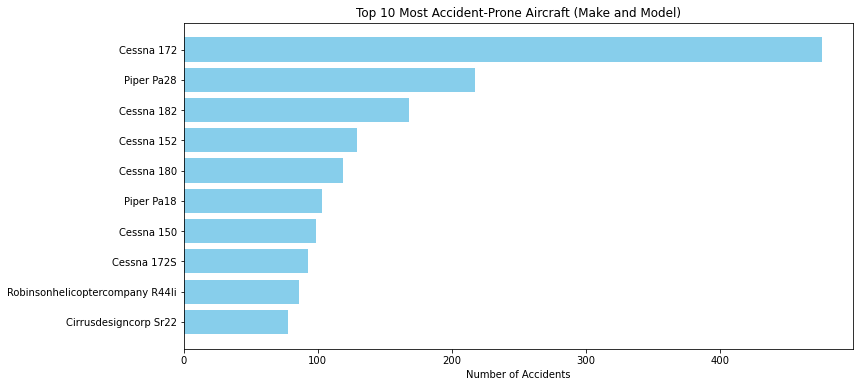

In [68]:

# new column 'Risk_Level'
make_model_counts['make_model_accident_Risk_Level'] = make_model_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')

# top 10 most accident-prone Make-Model combinations
make_model_counts.head(10)

# bar chart for top 10 Make-Model combinations
top_10 = make_model_counts.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10['Make'] + " " + top_10['Model'], top_10['Accident_Count'], color='skyblue')
plt.xlabel('Number of Accidents')
plt.title('Top 10 Most Accident-Prone Aircraft (Make and Model)')
plt.gca().invert_yaxis()  # Highest values on top
plt.show()

##### make and model combination with the least accident

In [69]:
# Low Risk aircraft
low_risk_aircraft = make_model_counts[make_model_counts['make_model_accident_Risk_Level'] == 'Low Risk']

# Sorting by Accident_Count from lowest to highest
low_risk_aircraft = low_risk_aircraft.sort_values(by='Accident_Count', ascending=True)

# safest make and model (with lowest accident counts)
low_risk_accident = low_risk_aircraft
low_risk_accident

,Make,Model,Accident_Count,make_model_accident_Risk_Level
2910,Ransemployeeflyingclub,Ranss6S,1,Low Risk
1055,Cgsaviationllc,Hawkarrowiislsa,1,Low Risk
1056,Chadlewis,Kitfoxsupersport,1,Low Risk
1057,Challenger,Ii,1,Low Risk
1058,Challenger,Iicw,1,Low Risk
...,...,...,...,...
1429,Ercoupe,415,10,Low Risk
489,Beech,F33,10,Low Risk
2205,Maule,M7,10,Low Risk
2705,Piper,Pa22-150,10,Low Risk


##### make & model with most fatal accidents

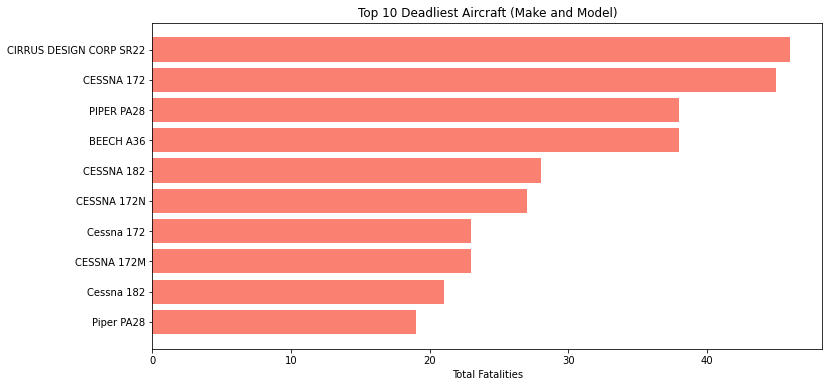

In [70]:
# Make, Model, and Total Fatal Injuries columns
make_model_fatal_data = aviation_data[['Make', 'Model', 'Total_Fatal_Injuries']]

# Getting rid of rows where Make, Model, or Fatalities are missing
make_model_fatal_data = make_model_fatal_data.dropna()

# Group by Make and Model and sum the Total Fatal Injuries
make_model_fatalities = make_model_fatal_data.groupby(['Make', 'Model'])['Total_Fatal_Injuries'].sum().reset_index()

# Sorting by highest number of fatalities
make_model_fatalities = make_model_fatalities.sort_values(by='Total_Fatal_Injuries', ascending=False)

# Creating a Risk Level based on Total Fatalities
make_model_fatalities['Fatality_Risk_Level'] = make_model_fatalities['Total_Fatal_Injuries'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')

import matplotlib.pyplot as plt

# Top 10 by fatalities
top_10_fatalities = make_model_fatalities.head(10)

# Bar chart
plt.figure(figsize=(12,6))
plt.barh(top_10_fatalities['Make'] + " " + top_10_fatalities['Model'], top_10_fatalities['Total_Fatal_Injuries'], color='salmon')
plt.xlabel('Total Fatalities')
plt.title('Top 10 Deadliest Aircraft (Make and Model)')
plt.gca().invert_yaxis()  # Highest first
plt.show()



##### make & model with least fatal accidents

In [71]:
# Filter Low Risk ones only
low_risk_make_models = make_model_fatalities[make_model_fatalities['Fatality_Risk_Level'] == 'Low Risk']

# Sort by lowest fatalities (smallest to largest)
low_risk_make_models = low_risk_make_models.sort_values(by='Total_Fatal_Injuries', ascending=True)

# Top 10 lowest fatality
low_risk_fatalities = low_risk_make_models
low_risk_fatalities

,Make,Model,Total_Fatal_Injuries,Fatality_Risk_Level
3289,REILLY CHARLES W,ESCAPADE,0.0,Low Risk
972,CESSNA,185,0.0,Low Risk
973,CESSNA,185 - E,0.0,Low Risk
974,CESSNA,185B,0.0,Low Risk
975,CESSNA,185D,0.0,Low Risk
...,...,...,...,...
2892,PIPER,PA 31,10.0,Low Risk
3143,Piper,PA 31T,10.0,Low Risk
795,Beech,58,10.0,Low Risk
3277,RAYTHEON AIRCRAFT COMPANY,A36,10.0,Low Risk


**Make & Model Summary**  

Aircraft manufacturers such as Cessna, piper, Robinson Helicopter company have the highest number of accidents. 

On the other hand, aircrafts with minimal accidents such as the Rans S6S, Hawk Arrow II, Kitfox Super Sport suggests that factors like design, usage, or operational procedures may contribute to their safety. 

While some aircraft models have a higher total number of accidents, certain planes, such as the Cirrus SR22 have been involved in some of the deadliest incidents, with a higher number of fatalities.


## 2. Engines

In [77]:
# relevant columns
engine_data = aviation_data[['Number_of_Engines', 'Total_Fatal_Injuries']]

# Group by Number of Engines and count accidents
engine_accident_counts = engine_data.groupby('Number_of_Engines').size().reset_index(name='Accident_Count')

# Sort by accident count
engine_accident_counts = engine_accident_counts.sort_values(by='Accident_Count', ascending=False)

# Add Engine Risk Label (High Risk if >10 accidents)
engine_accident_counts['Engine_Risk_Level'] = engine_accident_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')


print(engine_accident_counts)


   Number_of_Engines  Accident_Count Engine_Risk_Level
1                1.0           10107         High Risk
2                2.0             844         High Risk
0                0.0              11         High Risk
4                4.0               4          Low Risk
5                8.0               2          Low Risk
3                3.0               1          Low Risk


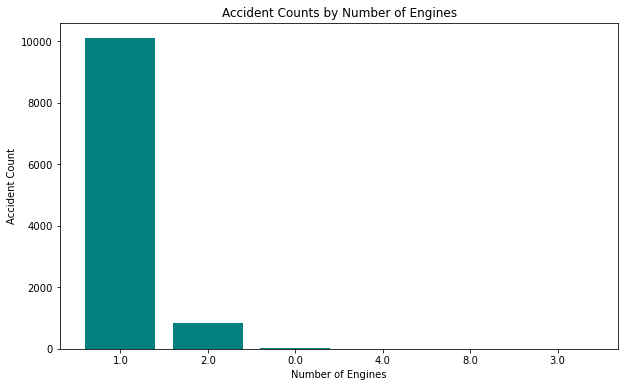

In [78]:

# Plot
plt.figure(figsize=(10,6))
plt.bar(engine_accident_counts['Number_of_Engines'].astype(str), engine_accident_counts['Accident_Count'], color='teal')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.title('Accident Counts by Number of Engines')
plt.show()

Single-engine aircraft are disproportionately more accident-prone compared to those with multiple engines, potentially due to the limited redundancy and higher operational risks associated with single-engine designs.

##### Make & Model Accidents counts per Engine

In [73]:
# Selecting relevant columns
make_model_engine_data = aviation_data[['Make', 'Model', 'Number_of_Engines', 'Total_Fatal_Injuries']]


# To calculate accident counts by 'Make', 'Model', and 'Number_of_Engines' 
make_model_engine_accidents = make_model_engine_data.groupby(['Make', 'Model', 'Number_of_Engines']).size().reset_index(name='Accident_Count')

# Sort by Accident_Count from highest to lowest
make_model_engine_accidents = make_model_engine_accidents.sort_values(by='Accident_Count', ascending=False)

# Adding 'Engine_Risk_Level' based on the accident count
make_model_engine_accidents['Engine_Risk_Level'] = make_model_engine_accidents['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')

# Print the result
make_model_engine_accidents


,Make,Model,Number_of_Engines,Accident_Count,Engine_Risk_Level
913,CESSNA,172,1.0,282,High Risk
1321,Cessna,172,1.0,194,High Risk
3027,PIPER,PA28,1.0,110,High Risk
956,CESSNA,182,1.0,101,High Risk
906,CESSNA,152,1.0,98,High Risk
...,...,...,...,...,...
1732,FETTERMAN LANNY R,FIRESTAR II,1.0,1,Low Risk
1733,FIELDS,Steen Skybolt,1.0,1,Low Risk
1734,FIELDS MIKE,HAWK SSC,1.0,1,Low Risk
1735,FISHER,CELEBRITY,1.0,1,Low Risk


Accident Counts Per Engine Type

In [54]:
# relevant columns
engine_type_data = aviation_data[['Engine_Type', 'Total_Fatal_Injuries']]

# Drop missing values
engine_type_data = engine_type_data.dropna()

# Group by Engine Type and count accidents
engine_type_accident_counts = engine_type_data.groupby('Engine_Type').size().reset_index(name='Accident_Count')

# Sort by accident count
engine_type_accident_counts = engine_type_accident_counts.sort_values(by='Accident_Count', ascending=False)

# Engine Type Risk Label
engine_type_accident_counts['Engine_Type_Risk_Level'] = engine_type_accident_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')


print(engine_type_accident_counts)


      Engine_Type  Accident_Count Engine_Type_Risk_Level
4   Reciprocating            9782              High Risk
7      Turbo Prop             520              High Risk
8     Turbo Shaft             476              High Risk
5       Turbo Fan             110              High Risk
6       Turbo Jet              44              High Risk
10        Unknown              14              High Risk
3            None              13              High Risk
0        Electric               6               Low Risk
2            NONE               2               Low Risk
1              LR               1               Low Risk
9             UNK               1               Low Risk


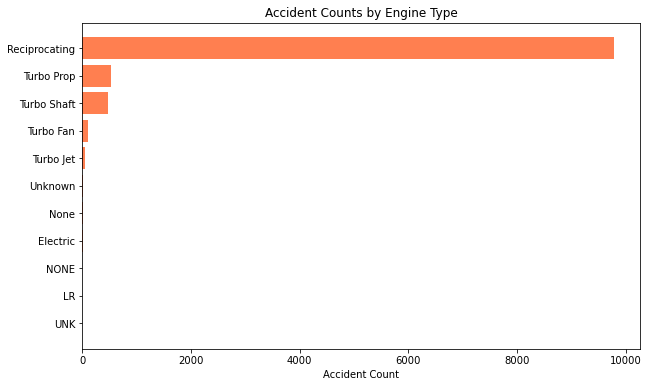

In [55]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(engine_type_accident_counts['Engine_Type'], engine_type_accident_counts['Accident_Count'], color='coral')
plt.xlabel('Accident Count')
plt.title('Accident Counts by Engine Type')
plt.gca().invert_yaxis()
plt.show()


 Accident Trend Over Time by Engine Type


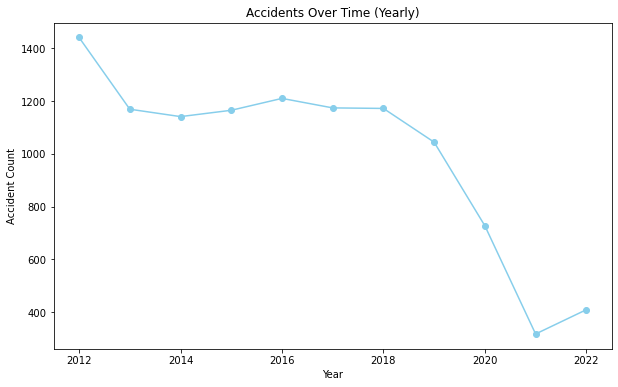

In [80]:

# total accident count per year
accidents_per_year = aviation_data.groupby('Year').size().reset_index(name='Accident_Count')

# Plotting the accidents over time (year)
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year['Year'], accidents_per_year['Accident_Count'], marker='o', color='skyblue')

# labels and title
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.title('Accidents Over Time (Yearly)')

# Displaying the plot
plt.show()


Evolution of injuries and no injuries over time

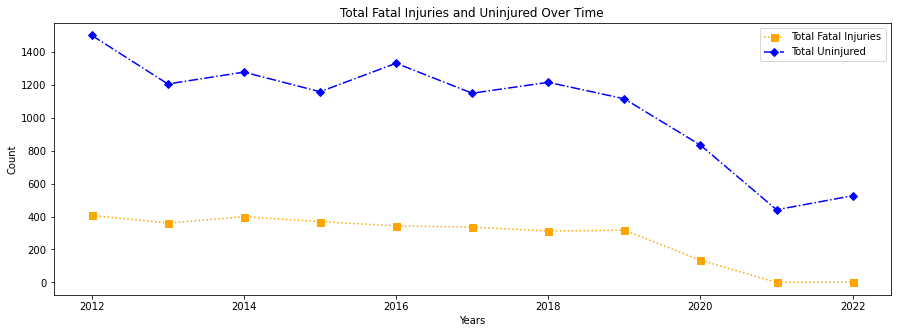

In [92]:

# Grouping data by year to sum total injuries and total uninjured
injuries_over_time = aviation_data.groupby('Event_Year').agg({'Total_Fatal_Injuries': 'sum', 'Total_Uninjured': 'sum'}).reset_index()

# Plotting Total Fatal Injuries and Total Uninjured over the years
plt.figure(figsize=(15, 5))

# Plot for Total Fatal Injuries
plt.plot(injuries_over_time['Event_Year'], injuries_over_time['Total_Fatal_Injuries'], label='Total Fatal Injuries', marker='s', markersize=7, linestyle='dotted', color='orange')

# Plot for Total Uninjured
plt.plot(injuries_over_time['Event_Year'], injuries_over_time['Total_Uninjured'], label='Total Uninjured', marker='D', markersize=5, linestyle='dashdot', color='blue')

# labels and title
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Total Fatal Injuries and Uninjured Over Time')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()




**Summary on number of accidents & Fatalities Over Time**  
The number of fatalities in aviation accidents has shown a consistent decline over the years. This suggests improvements in aviation safety, potentially due to advancements in aircraft design, better pilot training, stricter regulations, and more effective safety measures being implemented across the industry.

Accidents by weather condition

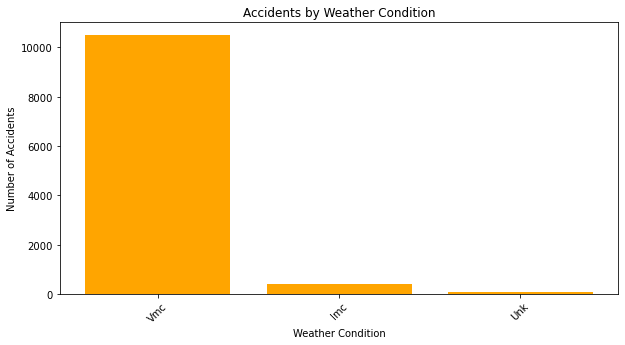

In [ ]:

# Standardizing the weather column

aviation_data['Weather_Condition'] = aviation_data['Weather_Condition'].str.replace(' ', '').str.title()

# Grouping by 'Weather_Condition' and counting accidents
weather_accident_counts = aviation_data.groupby('Weather_Condition').size().reset_index(name='Accident_Count')

# Sort by accident count in descending order to see which weather conditions have more accidents
weather_accident_counts = weather_accident_counts.sort_values(by='Accident_Count', ascending=False)

weather_accident_counts = weather_accident_counts.sort_values(by='Accident_Count', ascending=False)

# Plot as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(weather_accident_counts['Weather_Condition'], weather_accident_counts['Accident_Count'], color='orange')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()



**Conclusion on Accidents and Weather Conditions**  
Weather conditions have a significant impact on aviation accidents. Clear skies (VMC) are associated with the highest number of accidents, likely due to increased flight activity. 

# Exporting aviation_data as a CSV file.

In [95]:
# Merge the accident counts by make, model, and engine with the final dataframe
make_model_final = pd.merge(
    make_model_final,
    make_model_engine_accidents[['Make', 'Model', 'Number_of_Engines', 'Accident_Count', 'Engine_Risk_Level']],
    on=['Make', 'Model'],
    how='left'  # Keep all combinations from the existing data
)

# Check the final dataframe
make_model_final



,Make,Model,Accident_Count_x,make_model_accident_Risk_Level,Total_Fatal_Injuries,Fatality_Risk_Level,Number_of_Engines_x,Accident_Count_y,Engine_Risk_Level_x,Number_of_Engines_y,Accident_Count_x,Engine_Risk_Level_y,Number_of_Engines,Accident_Count_y,Engine_Risk_Level
0,CESSNA,172,282,High Risk,45.0,High Risk,1.0,282,High Risk,1.0,282,High Risk,1.0,282,High Risk
1,Cessna,172,194,High Risk,23.0,High Risk,1.0,194,High Risk,1.0,194,High Risk,1.0,194,High Risk
2,PIPER,PA28,110,High Risk,38.0,High Risk,1.0,110,High Risk,1.0,110,High Risk,1.0,110,High Risk
3,CESSNA,182,101,High Risk,28.0,High Risk,1.0,101,High Risk,1.0,101,High Risk,1.0,101,High Risk
4,CESSNA,152,98,High Risk,11.0,High Risk,1.0,98,High Risk,1.0,98,High Risk,1.0,98,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,FIELDS MIKE,HAWK SSC,1,Low Risk,0.0,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk
4147,FISHER,CELEBRITY,1,Low Risk,1.0,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk
4148,FISHER FLYING PRODUCTS,Dakota Hawk,1,Low Risk,0.0,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk
4149,FISHER FLYING PRODUCTS,Super Koala,1,Low Risk,0.0,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk,1.0,1,Low Risk


In [58]:
!pip install xlsxwriter
import pandas as pd

In [96]:
#  path
output_path = r"C:\Users\A808865\Desktop\hafsa_aviation_analysis_updated.xlsx"

# Create an Excel writer
with pd.ExcelWriter(output_path, engine='xlsxwriter') as writer:
    # Save your full aviation_data to the first sheet
    aviation_data.to_excel(writer, sheet_name='Full_Data', index=False)
    
    # Save the Make & Model combined analysis to another sheet
    make_model_final.to_excel(writer, sheet_name='Make & Model Data', index=False)

    # Optionally, save the engine analysis (accidents and engine risk level) to a new sheet
    make_model_engine_accidents.to_excel(writer, sheet_name='Make_Model_Engine_Analysis', index=False)

print("Excel file saved successfully with the three sheets!")


Excel file saved successfully with the three sheets!
